# ODS NLP Cource: Seminar 03 - Text Vectorization

Что почитать:
- [Яндекс учебник](https://education.yandex.ru/handbook/ml/article/linear-models)
- [ШАД-конспект по Classic ML](https://t.me/dimension_ai/164)

# [1] Разреженные эмбеддинги

## Bag of Words

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc = OneHotEncoder()
enc.fit(X)
print(*enc.categories_)

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

['female' 'male'] ['from Europe' 'from US'] ['uses Firefox' 'uses Safari']


array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
    )

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [ ]:
from gensim.utils import simple_preprocess
from gensim import corpora
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
tokens = [simple_preprocess(line) for line in corpus]
vocab = corpora.Dictionary(tokens)
docs = [vocab.doc2bow(sent) for sent in tokens]

pd.DataFrame(
    [pd.Series(dict(doc)) for doc in docs]
    ).rename(columns=vocab).fillna(0).astype(int)

,document,first,is,the,this,second,and,one,third
0,1,1,1,1,1,0,0,0,0
1,2,0,1,1,1,1,0,0,0
2,0,0,1,1,1,0,1,1,1
3,1,1,1,1,1,0,0,0,0


## TF-iDF

In [ ]:
import numpy as np
from sklearn.preprocessing import TargetEncoder

X, y = np.array(
    [("dog", 0)] * 20 +
    [("dog", 1)] * 5 +
    [("cat", 0)] * 15 +
    [("cat", 1)] * 10 +
    [("snake", 0)] * 5 +
    [("snake", 1)] * 20).T

enc = TargetEncoder()
enc.fit(X[:, None], y.astype(int))

enc.transform([['dog'], ['cat'], ['cat'], ['snake']])

array([[0.20668524],
       [0.40247593],
       [0.40247593],
       [0.79164345]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
    ).round(2)

,and,document,first,is,one,second,the,third,this
0,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38
1,0.00,0.69,0.00,0.28,0.00,0.54,0.28,0.00,0.28
2,0.51,0.00,0.00,0.27,0.51,0.00,0.27,0.51,0.27
3,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())])
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = pipe.fit_transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=sorted(pipe['count'].vocabulary_)
    ).round(2)

,and,document,first,is,one,second,the,third,this
0,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38
1,0.00,0.69,0.00,0.28,0.00,0.54,0.28,0.00,0.28
2,0.51,0.00,0.00,0.27,0.51,0.00,0.27,0.51,0.27
3,0.00,0.47,0.58,0.38,0.00,0.00,0.38,0.00,0.38


In [ ]:
from gensim.utils import simple_preprocess
from gensim import corpora, models
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
tokens = [simple_preprocess(line) for line in corpus]
vocab = corpora.Dictionary(tokens)
docs = [vocab.doc2bow(sent) for sent in tokens]
tfidf = models.TfidfModel(docs, smartirs='ntc')

pd.DataFrame(
    [pd.Series(dict(doc)) for doc in tfidf[docs]]
    ).rename(columns=vocab).fillna(0).round(2)

,document,first,is,the,this,second,and,one,third
0,0.46,0.82,0.20,0.20,0.20,0.00,0.00,0.00,0.00
1,0.53,0.00,0.11,0.11,0.11,0.83,0.00,0.00,0.00
2,0.00,0.00,0.08,0.08,0.08,0.00,0.57,0.57,0.57
3,0.46,0.82,0.20,0.20,0.20,0.00,0.00,0.00,0.00


# [2] Плотные эмбеддинги

## Word2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

dataset = api.load("text8")

# Train Word2Vec model
model = Word2Vec(dataset)

[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
wv = model.wv

In [ ]:
wv.most_similar('good')[:3]

[('bad', 0.7742161154747009),
 ('poor', 0.57615065574646),
 ('safe', 0.5727781057357788)]

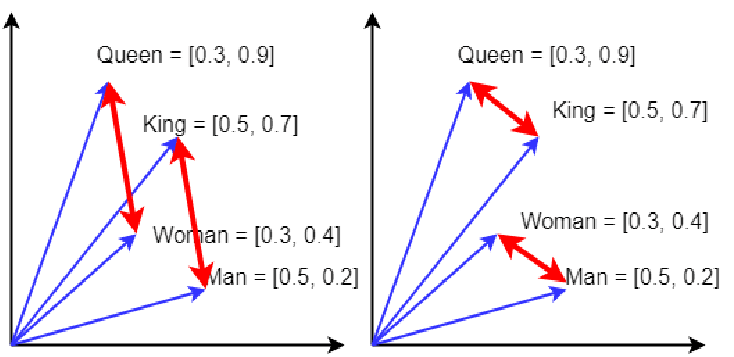

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])[:3]

[('queen', 0.6601258516311646),
 ('prince', 0.6301788091659546),
 ('empress', 0.622355043888092)]

In [ ]:
wv.similar_by_vector(
    wv.get_vector('woman', True) + wv.get_vector('king', True) - wv.get_vector('man', True))[:3]

[('king', 0.7961238026618958),
 ('queen', 0.6601258516311646),
 ('prince', 0.6301788091659546)]

In [ ]:
wv.similarity('ok', 'yes')

0.32753876

## GloVe

In [10]:
import gensim.downloader as api

wv_glove = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
wv = wv_glove

In [ ]:
wv.most_similar('good')[:3]

[('better', 0.9284391403198242),
 ('really', 0.9220623970031738),
 ('always', 0.9165270924568176)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])[:3]

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172)]

In [ ]:
wv.similar_by_vector(
    wv.get_vector('woman', True) + wv.get_vector('king', True) - wv.get_vector('man', True))[:3]

[('king', 0.8854023814201355),
 ('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886)]

In [ ]:
wv.similarity('ok', 'yes')

0.79652935

## FastText

In [8]:
%pip install -q compress-fasttext

  Preparing metadata (setup.py) ... done


In [9]:
import compress_fasttext

ft = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/v0.0.4/cc.en.300.compressed.bin'
)

In [ ]:
wv = ft

In [ ]:
wv.most_similar('good')[:3]

[('great', 0.7217045237532101),
 ('bad', 0.6990835063618114),
 ('decent', 0.691777177131285)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])[:3]

[('queen', 0.6693863114450961),
 ('princess', 0.5261241490633126),
 ('Queen', 0.5141801336154289)]

In [ ]:
wv.similar_by_vector(
    wv.get_vector('woman', True) + wv.get_vector('king', True) - wv.get_vector('man', True))[:3]

[('king', 0.7533272662127098),
 ('queen', 0.6693863114450961),
 ('princess', 0.5261241490633126)]

In [ ]:
wv.similarity('ok', 'yes')

0.5359969098653932

In [ ]:
import compress_fasttext

wv_ru = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/geowac_tokens_sg_300_5_2020-100K-20K-100.bin'
)
wv_ru.most_similar('котенок')[:3]

[('кот', 0.73910242544411),
 ('пес', 0.738830100262397),
 ('малыш', 0.7280327473055335)]

# [3] Классикация текста

### Обработка датасета

In [4]:
# Cоберём корпус в DataFrame
import nltk
from pathlib import Path
import pandas as pd

nltk.download("movie_reviews", download_dir='movie_reviews', quiet=True)
corpus_list = list(Path('movie_reviews').glob('**/*.txt'))
df = pd.DataFrame([{'text': path.read_text("utf-8"), 'label': path.parent.name} for path in corpus_list])
df.head()

,text,label
0,"i don't know what movie the critics saw , but ...",pos
1,i have to admit that i disliked this film init...,pos
2,there must be some unwritten rule that states ...,pos
3,"a couple of months ago , when i first download...",pos
4,one of the best movies i've ever seen . \ni'd ...,pos


In [18]:
# Объединим обработку текста в пайплайн
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download(['punkt', 'stopwords', 'omw-1.4', 'wordnet', 'extended_omw'], quiet=True)
wnl = WordNetLemmatizer()
wn.add_exomw()

def nltk_lemmatize(word):
    lemma = min((wnl.lemmatize(word.lower(), pos) for pos in 'nvars'),  key=lambda x: len(x) - (x!=word))
    morph = min((m if (m:=wn.morphy(lemma, pos)) else lemma for pos in 'nvars'), key=lambda x: len(x) - (x!=lemma))
    return morph

stop_words = stopwords.words('english')

# tokenize = word_tokenize
tokenize = RegexpTokenizer(r'\w+').tokenize

# normalize = SnowballStemmer("english").stem
normalize = nltk_lemmatize

def text_preproc(text):
    return [normalize(w) for w in tokenize(text) if w not in stop_words]


df['target'] = (df['label'] == 'pos') + 0
df['tokens'] = df['text'].apply(text_preproc)
df.head()

,text,label,target,tokens
0,"i don't know what movie the critics saw , but ...",pos,1,"[know, movie, critic, saw, one, popular, conse..."
1,i have to admit that i disliked this film init...,pos,1,"[admit, dislike, film, initially, certianly, e..."
2,there must be some unwritten rule that states ...,pos,1,"[must, unwritten, rule, state, one, get, enlig..."
3,"a couple of months ago , when i first download...",pos,1,"[couple, month, ago, first, download, face, tr..."
4,one of the best movies i've ever seen . \ni'd ...,pos,1,"[one, best, movie, ever, see, hear, extremely,..."


In [15]:
def get_vectorizer(wv_model):
    def vectorizer(sent: list[str]):
        return np.sum([wv_model[w] for w in sent if w in wv_model.key_to_index], axis=0)
    return vectorizer



In [ ]:
df['glove'] = df['tokens'].apply(get_vectorizer(wv_glove))
df['fasttext'] = df['tokens'].apply(get_vectorizer(ft))
df

In [164]:
# Разделим на Train и Test
from sklearn.model_selection import train_test_split

train_index, test_index = train_test_split(df.index, random_state=42)

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [154]:
df['fasttext'] = df['tokens'].apply(lambda text: np.sum([ft[w] for w in text if w in ft.key_to_index], axis=0))
df

,text,label,target,tokens,glove,train,fasttext
0,""" well this is not mission : difficult , mr ....",pos,1,"[``, well, mission, :, difficult, ,, mr, ., hu...","[116.52095, 90.18502, 0.8124541, -32.739185, 1...",1,"[-0.4009789249182971, -4.75865247551442, 2.656..."
1,in the company of men made a splash at the sun...,pos,1,"[company, men, make, splash, sundance, film, f...","[76.13704, 97.906715, -61.929443, -33.263943, ...",1,"[9.337767121305426, -7.291861040922513, 9.4671..."
2,it must be tough to be a mob boss . \njust ask...,pos,1,"[must, tough, mob, bos, ., ask, paul, vitti, (...","[38.997356, 44.65965, -23.296083, -11.062432, ...",0,"[2.324259359146483, -4.169261685572072, 5.2354..."
3,recently i read 4 reviews of pleasantville-one...,pos,1,"[recently, read, 4, review, pleasantville-one,...","[31.840225, 118.429214, -31.113361, -18.091007...",1,"[-2.09448144263921, -7.862455104948634, 8.3432..."
4,"near the end of 1996 , analysts remarked that ...",pos,1,"[near, end, 1996, ,, analyst, remark, year, wo...","[72.942085, 77.34278, -29.761929, 27.402824, 1...",1,"[0.37039465463390464, -5.736075592301928, 6.35..."
...,...,...,...,...,...,...,...
1995,i still can't figure out why people went in dr...,neg,0,"[still, ca, n't, figure, people, go, drive, se...","[22.56682, 59.386074, -46.16208, -30.457787, 1...",1,"[2.257832390563483, -5.61733367217376, 5.46168..."
1996,when robert forster found himself famous again...,neg,0,"[robert, forster, find, famous, appear, ``, ja...","[40.73389, 39.73169, -17.580975, -28.473831, 1...",1,"[1.1930347358567237, -3.17249182634117, 9.3145..."
1997,romeo is bleeding wants to carry the unusual f...,neg,0,"[romeo, bleed, want, carry, unusual, flavor, r...","[63.470226, 75.005905, -10.032, -38.984295, 16...",1,"[6.511724072390614, -7.901359801157659, 12.323..."
1998,"a new entry in the "" revisionist history "" gen...",neg,0,"[new, entry, ``, revisionist, history, ``, gen...","[46.051918, 111.899925, -53.37992, -37.739384,...",0,"[1.0239916224411993, -4.365288110778302, 6.439..."


### Обучение модели

[Документация по моделям sklearn](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [155]:
X_train = np.vstack(df.loc[train_index, 'fasttext'].values)
X_test = np.vstack(df.loc[test_index, 'fasttext'].values)
y_train = df.loc[train_index, 'target'].values
y_test = df.loc[test_index, 'target'].values

In [156]:
from sklearn.metrics import classification_report

In [157]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.87
test acc:  0.78


In [158]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.87
test acc:  0.77


In [159]:
from sklearn.svm import SVC, NuSVC

clf = SVC().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.67
test acc:  0.63


In [160]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.69


In [161]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.97
test acc:  0.71


In [162]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       254
           1       0.69      0.72      0.71       246

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.71      0.71      0.71       500

